In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/gys37319/code/GitHub/epsic_tools')
import epsic_tools.api as ep
import hyperspy.api as hs
import glob

In [2]:
#print subdirectories in visit
dir_list = ep.file_tools.visit_dir('e02', '2022', 'mg30752-7')

[ 0 ] :  /dls/e02/data/2022/mg30752-7
[ 1 ] :  /dls/e02/data/2022/mg30752-7/.ispyb
[ 2 ] :  /dls/e02/data/2022/mg30752-7/.ispyb/processed
[ 3 ] :  /dls/e02/data/2022/mg30752-7/xml
[ 4 ] :  /dls/e02/data/2022/mg30752-7/tmp
[ 5 ] :  /dls/e02/data/2022/mg30752-7/raw
[ 6 ] :  /dls/e02/data/2022/mg30752-7/raw/A2_Aguas_Zarcas_Site15
[ 7 ] :  /dls/e02/data/2022/mg30752-7/raw/Aui_calibrations
[ 8 ] :  /dls/e02/data/2022/mg30752-7/raw/T3_Winchcombe_site2
[ 9 ] :  /dls/e02/data/2022/mg30752-7/raw/R1_P035_GR25_A
[ 10 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9
[ 11 ] :  /dls/e02/data/2022/mg30752-7/spool
[ 12 ] :  /dls/e02/data/2022/mg30752-7/processing
[ 13 ] :  /dls/e02/data/2022/mg30752-7/.workspace


In [10]:
#show all dm3 files
file_list = ep.file_tools.list_files(dir_list, 10, '*.dm3')

[ 0 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0158.dm3
[ 1 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0148.dm3
[ 2 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0099.dm3
[ 3 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_12kX_0101.dm3
[ 4 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0094.dm3
[ 5 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_50kX_0115.dm3
[ 6 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0091.dm3
[ 7 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_100kX_0152.dm3
[ 8 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0135.dm3
[ 9 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0131.dm3
[ 10 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_200kX_0103.dm3
[ 11 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/One

In [14]:
#show all files with 6000X in filename
file_list = ep.file_tools.list_files(dir_list, 10, '*6000X*')

[ 0 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_6000X_0090.dm3
[ 1 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_6000X_0140.dm3


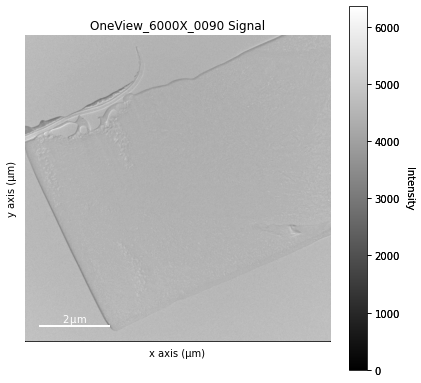

In [15]:
#load file number 0
low_res_img = hs.load(file_list[0])
low_res_img.plot()

In [17]:
#show all files with 40kX in filename
file_list = ep.file_tools.list_files(dir_list, 10, '*40kX*')

[ 0 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_40kX_0139.dm3
[ 1 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_40kX_0114.dm3
[ 2 ] :  /dls/e02/data/2022/mg30752-7/raw/T5_Winchcombe_site9/OneView_40kX_0100.dm3


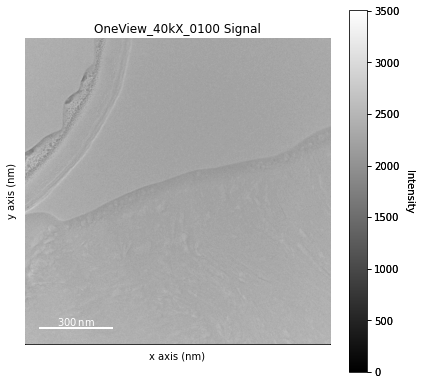

In [20]:
#load file number 2
high_res_img = hs.load(file_list[2])
high_res_img.plot()

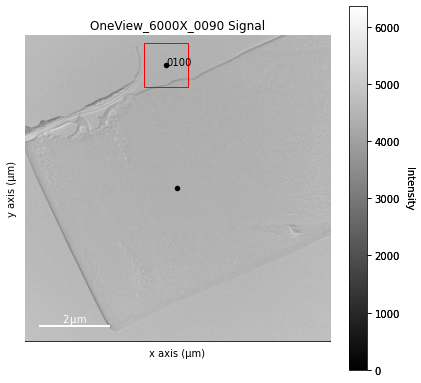

In [21]:
#show position of high_res_image on low_res_image from stage co-ords
ep.dm_tools.show_ROI(high_res_img, low_res_img)

this isn't great, let's try cross-correlation instead

6.947787201678973


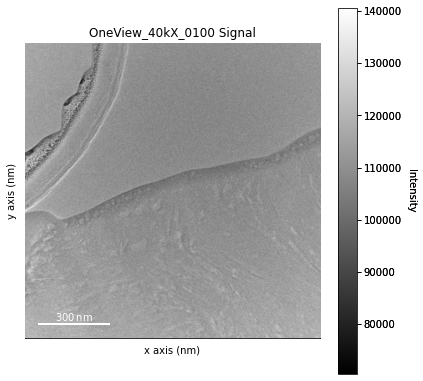

In [32]:
bin_img = ep.dm_tools.equalize_res(low_res_img, high_res_img)
bin_img.plot()

In [33]:
#check px size is now equal
print(ep.dm_tools.get_img_px_size(low_res_img), ep.dm_tools.get_img_px_size(bin_img))

2.172304317355156e-09 2.172304317355156e-09


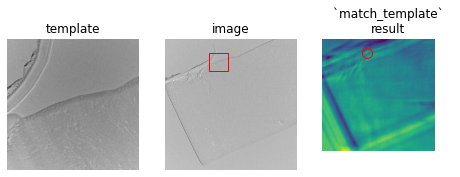

In [42]:
x,y = ep.dm_tools.template_match(low_res_img, bin_img)

this works much better!